With what information does Bayes Theorem update our previous knowledge about the data parameters?

**Answer:** 

1. By combining our previous knowledge (called the prior distribution),
2. With new information obtained from observed data,
3. Resulting in updated parameter knowledge (called the posterior distribution).

What does the prior probability represent?

**Answer:** Prior probability represents the probability distribution that would express one's beliefs about this quantity before some evidence is taken into account.

For the following exercises, work with the wine_flag_training and wine_flag_test data sets. Use either Python to solve each problem.
Here are the links to the datasets:

https://raw.githubusercontent.com/ArashVafa/DESC624/master/wine_flag_training.csv

https://raw.githubusercontent.com/ArashVafa/DESC624/master/wine_flag_test.csv


Create two contingency tables, one with Type and Alcohol_flag and another with Type and Sugar_flag.
Use the tables in the previous exercise to calculate:
* The prior probability of Type = Red and Type = White.
* The probability of high and low alcohol content.
* The probability of high and low sugar content.
* The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).
* The conditional probabilities p(Alcohol_flag = High ∣ Type = White) and p(Alcohol_flag = Low ∣ Type = White).
* The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).
* The conditional probabilities p(Sugar_flag = High ∣ Type = White) and p(Sugar_flag = Low ∣ Type = White).

Use the probabilities in the previous exercise to discuss
* How likely it is that a randomly selected wine is red.
* How likely it is that a randomly selected wine has a high alcohol content.
* How likely it is that a randomly selected wine has a low sugar content.


Use the conditional probabilities found earlier to discuss
* What a typical white wine might have as its alcohol and sugar content.
* What a typical red wine might have as its alcohol and sugar content.

Create side‐by‐side bar graphs for Type, one with an overlay of Alcohol_flag and the other with an overlay of Sugar_flag. Compare the graphs to the conditional probabilities you calculated.

Compute the posterior probability of Type = Red for a wine that is low in alcohol content and high in sugar content. Compute the posterior probability of Type = White for the same wine.

Use your answers to the previous exercise to determine which type, red or white, is more probable for a wine with low alcohol and high sugar content. What would the Naïve Bayes classifier classify this wine as?

Compute the posterior probability of Type = Red for a wine that is high in alcohol content and low in sugar content. Compute the posterior probability of Type = White for the same wine.

Use your answers to the previous exercise to determine which type, red or white, is more probable for a wine with high alcohol and low sugar content. What would the Naïve Bayes classifier classify this wine as?

Run the Naïve Bayes classifier to classify wines as white or red based on alcohol and sugar content.

Evaluate the Naïve Bayes model on the wines_test data set. Display the results in a contingency table. Edit the row and column names of the table to make the table more readable. Include a total row and column.

According to your table in the previous exercise, find the following values for the Naïve Bayes model:
* Accuracy
* Error rate

According to your contingency table, find the following values for the Naïve Bayes model:
* How often it correctly classifies red wines.
* How often it correctly classifies white wines.

For the following exercises, work with the wine_flag_training and wine_flag_test data sets. Use either Python to solve each problem.
Here are the links to the datasets:

https://raw.githubusercontent.com/ArashVafa/DESC624/master/wine_flag_training.csv

https://raw.githubusercontent.com/ArashVafa/DESC624/master/wine_flag_test.csv


In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer


In [2]:
# load training dataset
wine_train = pd.read_csv('https://raw.githubusercontent.com/ArashVafa/DESC624/master/wine_flag_training.csv')
# load test dataset
wine_test = pd.read_csv('https://raw.githubusercontent.com/ArashVafa/DESC624/master/wine_flag_test.csv')

Create two contingency tables, one with Type and Alcohol_flag and another with Type and Sugar_flag.
Use the tables in the previous exercise to calculate:
* The prior probability of Type = Red and Type = White.
* The probability of high and low alcohol content.
* The probability of high and low sugar content.
* The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).
* The conditional probabilities p(Alcohol_flag = High ∣ Type = White) and p(Alcohol_flag = Low ∣ Type = White).
* The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).
* The conditional probabilities p(Sugar_flag = High ∣ Type = White) and p(Sugar_flag = Low ∣ Type = White).

In [3]:
# contingency table (type and alcohol_flag)
ct1 = pd.crosstab(wine_train.Type, wine_train.Alcohol_flag, margins=True)
print(ct1)
# contingency table (type and sugar_flag)
ct2 = pd.crosstab(wine_train.Type, wine_train.Sugar_flag, margins=True)
print(ct2)

Alcohol_flag  High  Low   All
Type                         
Red            218  282   500
White          268  232   500
All            486  514  1000
Sugar_flag  High  Low   All
Type                       
Red          116  384   500
White        300  200   500
All          416  584  1000


In [4]:
prob1 = ct1['All']['Red']/ct1['All']['All']
print(f'''The prior probability of Type = Red is {round(prob1*100, 2)}%''')
print(f'''The prior probability of Type = White is {round((1-prob1)*100, 2)}%''')
prob2 = ct1['High']['All']/ct1['All']['All']
print(f'''The probability of high alcohol content is {round(prob2*100, 2)}%''')
print(f'''The probability of low alcohol content is {round((1-prob2)*100, 2)}%''')
prob3 = ct2['High']['All']/ct2['All']['All']
print(f'''The probability of high sugar content is {round(prob3*100, 2)}%''')
print(f'''The probability of low sugar content is {round((1-prob3)*100, 2)}%''')
prob4 = ct1['High']['Red']/ct1['All']['Red']
print(f'''The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) is {round(prob4*100, 2)}%''')
print(f'''The conditional probabilities p(Alcohol_flag = Low ∣ Type = Red) is {round((1-prob4)*100, 2)}%''')
prob5 = ct1['High']['White']/ct1['All']['White'] 
print(f'''The conditional probabilities p(Alcohol_flag = High ∣ Type = White) is {round(prob5*100, 2)}%''')
print(f'''The conditional probabilities p(Alcohol_flag = Low ∣ Type = White) is {round((1-prob5)*100, 2)}%''')
prob6 = ct2['High']['Red']/ct2['All']['Red']
print(f'''The conditional probabilities p(Sugar_flag = High ∣ Type = Red) is {round(prob6*100, 2)}%''')
print(f'''The conditional probabilities p(Sugar_flag = Low ∣ Type = Red) is {round((1-prob6)*100, 2)}%''')
prob7 = ct2['High']['White']/ct2['All']['White']
print(f'''The conditional probabilities p(Sugar_flag = High ∣ Type = White) is {round(prob7*100, 2)}%''')
print(f'''The conditional probabilities p(Sugar_flag = Low ∣ Type = White) is {round((1-prob7)*100, 2)}%''')

The prior probability of Type = Red is 50.0%
The prior probability of Type = White is 50.0%
The probability of high alcohol content is 48.6%
The probability of low alcohol content is 51.4%
The probability of high sugar content is 41.6%
The probability of low sugar content is 58.4%
The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) is 43.6%
The conditional probabilities p(Alcohol_flag = Low ∣ Type = Red) is 56.4%
The conditional probabilities p(Alcohol_flag = High ∣ Type = White) is 53.6%
The conditional probabilities p(Alcohol_flag = Low ∣ Type = White) is 46.4%
The conditional probabilities p(Sugar_flag = High ∣ Type = Red) is 23.2%
The conditional probabilities p(Sugar_flag = Low ∣ Type = Red) is 76.8%
The conditional probabilities p(Sugar_flag = High ∣ Type = White) is 60.0%
The conditional probabilities p(Sugar_flag = Low ∣ Type = White) is 40.0%


Use the probabilities in the previous exercise to discuss

* How likely it is that a randomly selected wine is red.
* How likely it is that a randomly selected wine has a high alcohol content.
* How likely it is that a randomly selected wine has a low sugar content.

In [5]:
print(f'''The probability that a randomly selected wine is red is {round(prob1*100, 2)}%''')
print(f'''The probability that a randomly selected wine has a high alcohol content is {round(prob2*100, 2)}%''')
print(f'''The probability that a randomly selected wine has a low sugar content is {round((1-prob3)*100, 2)}%''')

The probability that a randomly selected wine is red is 50.0%
The probability that a randomly selected wine has a high alcohol content is 48.6%
The probability that a randomly selected wine has a low sugar content is 58.4%


Use the conditional probabilities found earlier to discuss

* What a typical white wine might have as its alcohol and sugar content.

**Answer:** A typical white wine might have high alcohol and high sugar.

* What a typical red wine might have as its alcohol and sugar content.

**Answer:** A typical red wine might have low alcohol and low sugar.

Create side‐by‐side bar graphs for Type, one with an overlay of Alcohol_flag and the other with an overlay of Sugar_flag. Compare the graphs to the conditional probabilities you calculated.

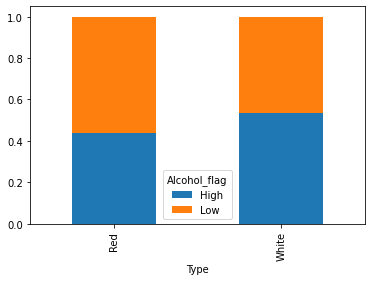

In [6]:
crosstab_01 = pd.crosstab(wine_train['Type'], wine_train['Alcohol_flag'])
crosstab_norm_01 = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm_01.plot(kind = 'bar', stacked = True)

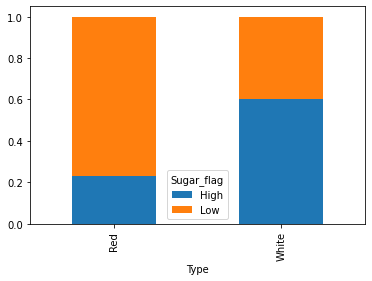

In [7]:
crosstab_02 = pd.crosstab(wine_train['Type'], wine_train['Sugar_flag'])
crosstab_norm_02 = crosstab_02.div(crosstab_02.sum(1),axis = 0)
crosstab_norm_02.plot(kind = 'bar', stacked = True)

**Answer:** The bar graphs shown above have the same result compared to the conditional probabilities calculated.

Compute the posterior probability of Type = Red for a wine that is low in alcohol content and high in sugar content. Compute the posterior probability of Type = White for the same wine.

Use your answers to the previous exercise to determine which type, red or white, is more probable for a wine with low alcohol and high sugar content. What would the Naïve Bayes classifier classify this wine as?

In [8]:
prob8 = (1-prob4) * prob6 * prob1 / (1-prob2) / prob3
prob9 = (1-prob5) * prob7 * (1-prob1) / (1-prob2) / prob3
print(f'''P(Red|Low Alcohol & High Sugar) = {round(prob8*100,2)}%''')
print(f'''P(White|Low Alcohol & High Sugar) = {round(prob9*100,2)}%''')

P(Red|Low Alcohol & High Sugar) = 30.6%
P(White|Low Alcohol & High Sugar) = 65.1%


**Answer:** Since the posterior probability of a low alcohol, high sugar wine being red is lower than the posterior probability of the same wine being white, the Naïve Bayes algorithm will classify the wine as **White**.

Compute the posterior probability of Type = Red for a wine that is high in alcohol content and low in sugar content. 
Compute the posterior probability of Type = White for the same wine.

Use your answers to the previous exercise to determine which type, red or white, is more probable for a wine with high alcohol and low sugar content. What would the Naïve Bayes classifier classify this wine as?

In [9]:
prob10 = prob4 * (1-prob6) * prob1 / prob2 / (1-prob3)
prob11 = prob5 * (1-prob7) * (1-prob1) / prob2 / (1-prob3)
print(f'''P(Red|High Alcohol & Low Sugar) = {round(prob10*100,2)}%''')
print(f'''P(White|High Alcohol & Low Sugar) = {round(prob11*100,2)}%''')

P(Red|High Alcohol & Low Sugar) = 58.99%
P(White|High Alcohol & Low Sugar) = 37.77%


**Answer:** Since the posterior probability of a high alcohol, low sugar wine being red is higher than the posterior probability of the same wine being white, the Naïve Bayes algorithm will classify the wine as **Red**.

Run the Naïve Bayes classifier to classify wines as white or red based on alcohol and sugar content.

In [10]:
wine_train['Type']= wine_train['Type'].replace({'Red': 1})
wine_train['Type']= wine_train['Type'].replace({'White': 0})
wine_train['Alcohol_flag']= wine_train['Alcohol_flag'].replace({'Low': 0})
wine_train['Alcohol_flag']= wine_train['Alcohol_flag'].replace({'High': 1})
wine_train['Sugar_flag']= wine_train['Sugar_flag'].replace({'Low': 0})
wine_train['Sugar_flag']= wine_train['Sugar_flag'].replace({'High': 1})
X_train = wine_train.drop(['Type'], axis =1)
y_train = wine_train['Type']

nb = GaussianNB().fit(X_train, y_train)

Evaluate the Naïve Bayes model on the wines_test data set. Display the results in a contingency table. Edit the row and column names of the table to make the table more readable. Include a total row and column.

In [11]:
wine_test['Type']= wine_test['Type'].replace({'Red': 1})
wine_test['Type']= wine_test['Type'].replace({'White': 0})
wine_test['Alcohol_flag']= wine_test['Alcohol_flag'].replace({'Low': 0})
wine_test['Alcohol_flag']= wine_test['Alcohol_flag'].replace({'High': 1})
wine_test['Sugar_flag']= wine_test['Sugar_flag'].replace({'Low': 0})
wine_test['Sugar_flag']= wine_test['Sugar_flag'].replace({'High': 1})
X_test = wine_test.drop(['Type'], axis =1)
y_test = wine_test['Type']


In [12]:
y_predict = nb.predict(X_test)
y_predict = pd.DataFrame(y_predict,index = y_test.index, columns = ['Predict'])
y_test = wine_test[['Type']]
y_test.rename(columns={'Type':'Actual'},inplace=True)
df = y_predict.join(y_test)
df['Predict']= df['Predict'].replace({1: 'Red'})
df['Predict']= df['Predict'].replace({0: 'White'})
df['Actual']= df['Actual'].replace({1: 'Red'})
df['Actual']= df['Actual'].replace({0: 'White'})
ct3 = pd.crosstab(df.Predict, df.Actual, margins=True)
ct3

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Actual,Red,White,All
Predict,,,
Red,464,678,1142
White,121,1082,1203
All,585,1760,2345


According to your table in the previous exercise, find the following values for the Naïve Bayes model:

* Accuracy
* Error rate

In [13]:
accuracy = (ct3['Red']['Red']+ct3['White']['White'])/ct3['All']['All']
error_rate = 1-accuracy
print(f'''The Accuracy of the Naive Bayes model is {round((accuracy*100),2)}%''')
print(f'''The Error Rate of the Naive Bayes model is {round((error_rate*100),2)}%''')

The Accuracy of the Naive Bayes model is 65.93%
The Error Rate of the Naive Bayes model is 34.07%


According to your contingency table, find the following values for the Naïve Bayes model:

* How often it correctly classifies red wines.

* How often it correctly classifies white wines.

In [14]:
red = ct3['Red']['Red']/ct3['All']['Red']
white = ct3['White']['White']/ct3['All']['White']
print(f'''The Naive Bayes model predicts {round((red*100),2)}% red wines correctly.''')
print(f'''The Naive Bayes model predicts {round((white*100),2)}% white wines correctly.''')

The Naive Bayes model predicts 40.63% red wines correctly.
The Naive Bayes model predicts 89.94% white wines correctly.


Name a few classification algorithm, choose one and use it on a dataset of your choosing.

**Answer:** There are decision tree, xgboost, random forest, neural network, K-Nearest Neighbors, Logistic Regression and Naive Bayes. In this problem, I'll use Logistic Regression on the Wisconsin breast cancer dataset from sklearn package.

In [15]:
df = load_breast_cancer()
X = pd.DataFrame(df.data, columns=df.feature_names) #predictors
y = pd.Categorical.from_codes(df.target, df.target_names) #target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy =', round(np.mean(y_pred == y_test), 4))

Accuracy = 0.9649


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Apply ANN and decision tree algorithm on the wine dataset and compare the result? which one is better and why?

In [17]:
X_train = wine_train.drop(['Type'], axis =1)
y_train = wine_train['Type']
X_test = wine_test.drop(['Type'], axis =1)
y_test = wine_test['Type']

In [18]:
nn = MLPClassifier(random_state=42).fit(X_train, y_train)
y_pred = nn.predict(X_test)
print('Accuracy =', round(np.mean(y_pred == y_test), 4))

Accuracy = 0.6593


In [19]:
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy =', round(np.mean(y_pred == y_test), 4))

Accuracy = 0.6593


The ANN and decision tree both have the same accuracy with the Naive Bays model, because there are only to predictors, and both predictor have binary values, which won't provide too much information for the models to make predictions.